In [1]:
import os
import numpy as np
import toml
import pandas
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

import seaborn
seaborn.set(style="white")

matplotlib.rcParams['axes.spines.top'] = False
matplotlib.rcParams['axes.spines.right'] = False
matplotlib.rcParams['axes.spines.bottom'] = False
matplotlib.rcParams['axes.spines.left'] = False
font = {'family' : 'Arial',
        'size'   : 18}
matplotlib.rc('font', **font)
matplotlib.rc('xtick', labelsize=18)
matplotlib.rc('ytick', labelsize=18)
matplotlib.rc('figure', figsize=(11, 6.8))
matplotlib.rc('axes', titlesize=24)
matplotlib.rc('legend', fontsize=18)
matplotlib.rc('axes', labelsize=18)

In [2]:
RESULT_DIR = '../results/'
def read_experiment(name):
    flags_path = os.path.join(RESULT_DIR, name, "options.toml")
    log_path = os.path.join(RESULT_DIR, name, "log.csv")
    return {
        'log': pandas.read_csv(log_path),
        'flags': toml.load(flags_path)
    }

In [3]:
experiments = os.listdir(RESULT_DIR)
experiments = [read_experiment(name) for name in experiments]

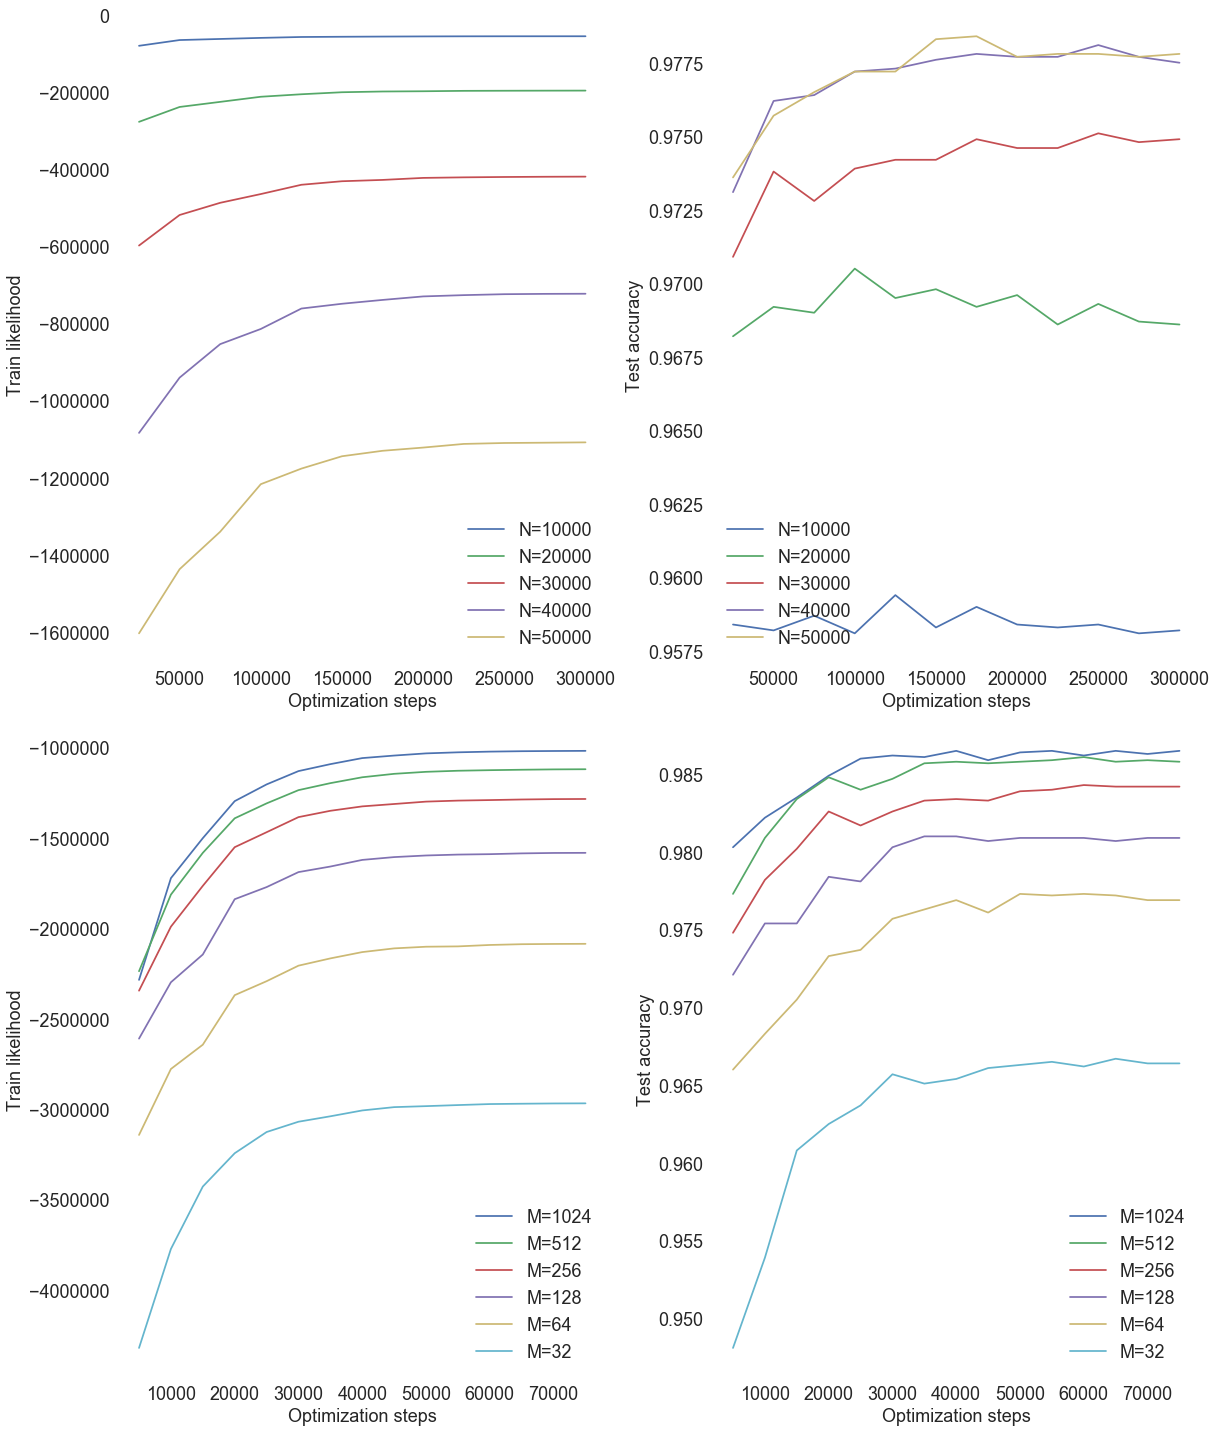

In [4]:
plot_shape = (2, 2)
figure = plt.figure(figsize=(17, 10 * plot_shape[1]))

def plot_likelihood_accuracy(experiments, label_fn, row=0):
    axis = plt.subplot2grid(plot_shape, (row, 0)) 

    for i, experiment in enumerate(experiments):
        likelihood = experiment['log']['train_log_likelihood'].values
        global_step = experiment['log']['global_step'].values
        label = label_fn(experiment)
        axis.plot(global_step, likelihood, c="C{}".format(i), label=label)
        axis.set_xlabel('Optimization steps')
        axis.set_ylabel('Train likelihood')
    axis.legend();


    axis = plt.subplot2grid(plot_shape, (row, 1))

    for i, experiment in enumerate(experiments):
        test_accuracy = experiment['log']['test_accuracy'].values
        global_step = experiment['log']['global_step'].values
        label = label_fn(experiment)
        axis.plot(global_step, test_accuracy, c="C{}".format(i), label=label)
        axis.set_xlabel('Optimization steps')
        axis.set_ylabel('Test accuracy')

    axis.legend();
    plt.tight_layout();
    
    
M100_experiments = [e for e in experiments if e['flags']['M'] == 100]
plot_likelihood_accuracy(M100_experiments, lambda e: "N={}".format(e['flags']['N']))


M_experiments = [e for e in experiments if e['flags']['N'] == 60000]
M_experiments.sort(key=lambda a: -a['flags']['M'])
plot_likelihood_accuracy(M_experiments, lambda e: "M={}".format(e['flags']['M']), row=1)